# Dependências

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import PIL

# Configurações

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

#Util

In [ ]:
def load_normalize(filename, noise):

  image = PIL.Image.open(filename)
  image = image.convert("L")
  image = image.resize((28,28))

  image = np.array(image)

  # Add noise to image
  image = image + noise * np.random.normal(loc=0.0, scale=1.0, size=image.shape)
  image = np.clip(image, 0., 1.)

  image = image.astype('float32') / 255.0

  image = np.expand_dims(image, axis=-1)

  return image

# def denormalize(image):
#   return (image.reshape(28,28)*255).astype(np.uint8)

def show_image(image):

  plt.figure(figsize=(1,1))
  plt.axis('off')

  plt.imshow(image.reshape(28, 28))
  plt.gray()
  plt.show()

# Dataset

In [ ]:
# Carregar o conjunto de dados MNIST como exemplo
dataset = mnist.load_data()

(X_train, _), (X_test, _) = mnist.load_data()

# Adicionar ruído às imagens de treino e teste
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Garantir que os valores estejam no intervalo [0, 1]
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Pré-processamento dos dados
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train_noisy = X_train_noisy.astype('float32') / 255.0
X_test_noisy = X_test_noisy.astype('float32') / 255.0

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train_noisy = np.expand_dims(X_train_noisy, axis=-1)
X_test_noisy = np.expand_dims(X_test_noisy, axis=-1)

# Modelo

In [ ]:
# Modelo Autoencoder para filtrar ruídos
input_shape = (28, 28, 1)

# Encoder
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


# Criar o modelo autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Visualizar a arquitetura do autoencoder
autoencoder.summary()

In [ ]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

# Treinamento (CPU: 10mins) (INCOMPLETO)

In [ ]:
epochs=10

######################## Coloque os dados de teste e validação ##################################
log = autoencoder.fit(TREINO_ENTRADA, TREINO_SAIDA, epochs=epochs, batch_size=128, shuffle=True, validation_data=(VALIDACAO_ENTRADA, VALIDACAO_SAIDA))

In [ ]:
losses = log.history["loss"]
val_losses = log.history["val_loss"]

data_epochs = np.arange(0, epochs, 1)
plt.plot(data_epochs, losses, color="yellow", lw=5, label = 'Training Loss')
plt.plot(data_epochs, val_losses, color="red", lw=5, label = 'Validation Loss')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Teste

In [ ]:
# Após o treinamento, você pode usar o autoencoder para filtrar ruídos das imagens
denoised_images = autoencoder.predict(X_test_noisy)

# Plotar exemplos
n = 10
plt.figure(figsize=(10, 2))

for i in range(n):
    # Imagem original com ruído
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem original sem ruído
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem filtrada pelo autoencoder
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# Subir uma imagem de teste no colab para testar

test_data = load_normalize("2.png", 0.5) #troque o rúido para ver a diferença
test_data  = np.array([test_data])

print(test_data.shape)
show_image(test_data[0])

predictions = autoencoder.predict(test_data)
print(predictions.shape)

image = predictions[0]
print(image.shape)

show_image(image)

# Questões

Configure o treinamento com os dados adequados de treino e validação.

Resultado Esperado (Ruídos, Originais e Geradas):

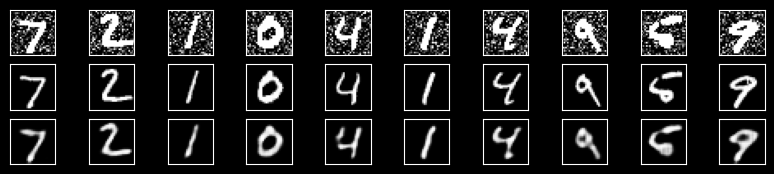